In [1]:
import os
os.getcwd()

'/Users/wohlfea/401d2/data-science'

In [2]:
import numpy as np
import pandas as pd
TEST_DATA = 'train.csv'
titanic_dataframe = pd.read_csv(TEST_DATA, header=0)
print('length: {0} '.format(len(titanic_dataframe)))
titanic_dataframe.head(5)


length: 891 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Describe the Data:
* We have 891 rows in the train.csv data.
* Columns in the data:
* PassengerId - a seemingly random, unique number given to each row in the data.
* Survived - a binary column. 1 means the person survived and 0 means they died.
* Pclass - an indicator of socio-economic status.
* Name - the name of a passenger on the Titanic.
* Sex - the gender of the passenger
* Age - the age of a given passenger
* SibSp - is the number of siblings and spouses aboard.
* Parch - number of parents/children
* Ticket - Ticket number of a given passenger
* Fare - The cost of the ticket
* Cabin - Where they stayed on the ship
* Embarked - Port of Embarkation.

Average age of all Titanic passengers:

In [3]:
avg_all = np.mean(titanic_dataframe['Age'])
print(avg_all)

29.69911764705882


Average age of Titanic survivors:

In [4]:
avg_survive = np.mean(titanic_dataframe[titanic_dataframe.Survived==1].Age)
print(avg_survive)

28.343689655172415


Average age of non-surviving first class passenger:

In [5]:
avg_nonsurvivor_firstclass = np.mean(titanic_dataframe[(titanic_dataframe.Survived==0) & (titanic_dataframe.Pclass==1)].Age)
print(avg_nonsurvivor_firstclass)

43.6953125


Average age of male survivors over 30 from anywhere but Queenstown:

In [6]:
avg_male_survived_30_noq = np.mean(titanic_dataframe[(titanic_dataframe.Survived==1) & (titanic_dataframe.Sex=='male') &
                                  (titanic_dataframe.Age > 30) & (titanic_dataframe.Embarked!='Q')].Age)
print(avg_male_survived_30_noq)

41.48780487804878


Difference between mean and median for all passengers, filling in NaN with mean

In [7]:
median_forall = np.median(titanic_dataframe[titanic_dataframe.Age > 0].Age)
print(median_forall - avg_all)

-1.69911764706


Difference between mean and median ages for survivors:

In [8]:
median_survivor = np.median(titanic_dataframe[(titanic_dataframe.Age >0) & (titanic_dataframe.Survived==1)].Age)
print(median_survivor - avg_survive)

-0.343689655172


Difference between mean and median ages for non surviving first class passengers:

In [9]:
median_first_dead = np.median(titanic_dataframe[(titanic_dataframe.Age >0) & (titanic_dataframe.Survived==0) &
                                              (titanic_dataframe.Pclass==1) ].Age)
print(median_first_dead - avg_nonsurvivor_firstclass)

1.5546875


Difference between mean and median ages for survivor men over 30 not from Queenstown:

In [10]:
median_men_noq = np.median(titanic_dataframe[(titanic_dataframe.Survived==1) & (titanic_dataframe.Sex=='male') &
                                  (titanic_dataframe.Age > 30) & (titanic_dataframe.Embarked!='Q')].Age)
print(median_men_noq - avg_male_survived_30_noq)

-3.48780487805


Most common passenger class:

In [11]:
titanic_dataframe['Pclass'].mode().item()

3

Mode of Port of Embarkation:

In [12]:
titanic_dataframe['Embarked'].mode().item()

'S'

Mode of siblings/spouses aboard:

In [13]:
titanic_dataframe['SibSp'].mode().item()

0

The median ticket price is 0-1 stds from the mean. It is below the mean

In [14]:
np.median(titanic_dataframe['Fare'])

14.4542

In [15]:
np.mean(titanic_dataframe['Fare'])

32.2042079685746

In [16]:
titanic_dataframe['Fare'].mode().item()

8.05

In [17]:
np.std(titanic_dataframe['Fare'], ddof=1)

49.693428597180905

The cost difference between the 90th and 5th percent tickets and their classes

In [18]:
nintieth_cost = titanic_dataframe['Fare'].quantile(.9)
fifth_cost = titanic_dataframe['Fare'].quantile(.05)
print(nintieth_cost - fifth_cost)

70.7333


In [19]:
class_level = titanic_dataframe[(titanic_dataframe.Fare ==  titanic_dataframe['Fare'].quantile(.05))].Pclass
print(class_level)

19     3
26     3
203    3
244    3
354    3
522    3
553    3
598    3
661    3
693    3
773    3
875    3
Name: Pclass, dtype: int64


In [20]:
upper_class = titanic_dataframe[(titanic_dataframe.Fare ==  titanic_dataframe['Fare'].quantile(.9))].Pclass
print(upper_class)

275    1
627    1
765    1
Name: Pclass, dtype: int64


The port with the most expensive average ticket price is Cherbourg

In [21]:
south = np.mean(titanic_dataframe[(titanic_dataframe.Embarked == 'S')].Fare)
queens =  np.mean(titanic_dataframe[(titanic_dataframe.Embarked == 'Q')].Fare)
cherb = np.mean(titanic_dataframe[(titanic_dataframe.Embarked == 'C')].Fare)
print(south, queens, cherb)

27.07981180124218 13.276029870129872 59.95414404761905


The port with the most similar passenger class is Queenstown because it has the smallest std

In [22]:
southie = np.std(titanic_dataframe[(titanic_dataframe.Embarked=='S')].Pclass)
queenie = np.std(titanic_dataframe[(titanic_dataframe.Embarked=='Q')].Pclass)
cherbie = np.std(titanic_dataframe[(titanic_dataframe.Embarked=='C')].Pclass)
print(southie, queenie, cherbie)

0.7887893083528223 0.3668687504370267 0.9412858178734583


The average surviving passenger with family members was ~6.88 years younger than the average non surviving passenger with no family

In [23]:
avg_surv_w_fam = np.mean(titanic_dataframe[(titanic_dataframe.Survived==1) & ((titanic_dataframe.SibSp > 0) | (titanic_dataframe.Parch > 0))].Age)
avg_non_no_fam = np.mean(titanic_dataframe[(titanic_dataframe.Survived==0) & (titanic_dataframe.SibSp==0) & (titanic_dataframe.Parch==0)].Age)
print(avg_surv_w_fam-avg_non_no_fam)

-6.888171076642337


Display the relationship (i.e. make a plot) between survival rate and the quantile of the ticket price for 20 integer quantiles. Make sure you label your axes.

/Users/wohlfea/anaconda3/envs/first_conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


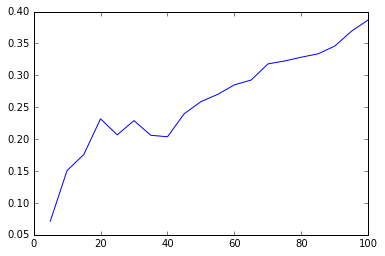

In [26]:
import matplotlib.pyplot as pl
%matplotlib inline

fare_quantiles = np.percentile(titanic_dataframe['Fare'], np.arange(5, 105, 5.0))
survival_quantiles = []
latest_quantile = 0
for f_q in fare_quantiles:
    folks= titanic_dataframe[(latest_quantile < titanic_dataframe.Fare) & (titanic_dataframe.Fare < f_q)]
    survival_quantiles.append(len(folks[titanic_dataframe.Survived == 1]) / float(len(folks)))
graph = pl.plot(np.arange(5, 105, 5.0), survival_quantiles)

Surviving men who paid less than median fare price:

In [8]:
median_fare = np.median(titanic_dataframe.Fare)
surviving_first_less_median_fare = len(titanic_dataframe[(titanic_dataframe.Survived==1) 
                                 & (titanic_dataframe.Pclass==1)
                                & (titanic_dataframe.Sex=='male')
                               & (titanic_dataframe.Fare < median_fare)])

surviving_first = len(titanic_dataframe[(titanic_dataframe.Survived==1) 
                                 & (titanic_dataframe.Pclass==1)
                                & (titanic_dataframe.Sex=='male')])
print(surviving_first_less_median_fare)
print(surviving_first)
print(median_fare)

0
45
14.4542
